<a href="https://colab.research.google.com/github/diyaarul2981/HBStage2ML/blob/main/CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*1. Importing libraries*

In [1]:
#Installing lazypredict software to compare machine learning algorithms
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


2. *Loading dataset from GitHub*

In [3]:
#Getting csv data file from github
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-08-19 11:12:41--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2021-08-19 11:12:41--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [4]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

*3. Preprocessing Data and reducing its size*

In [6]:
X.shape

(4695, 881)

In [7]:
# Removing low variance features to preprocess data
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

*4. Compare the Machine Learning Algorithms*

In [9]:
#defining and building lazy classifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train, test=clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:49<00:00,  1.18s/it]


In [10]:
#training set table
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,2.41
LGBMRegressor,0.46,0.54,1.06,0.38
RandomForestRegressor,0.44,0.52,1.08,4.31
XGBRegressor,0.43,0.51,1.09,1.91
BaggingRegressor,0.41,0.50,1.10,0.53
NuSVR,0.39,0.48,1.12,3.35
SVR,0.39,0.48,1.12,4.07
KNeighborsRegressor,0.37,0.46,1.14,0.96
MLPRegressor,0.36,0.45,1.15,6.36


In [11]:
#test set table
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,2.41
LGBMRegressor,0.46,0.54,1.06,0.38
RandomForestRegressor,0.44,0.52,1.08,4.31
XGBRegressor,0.43,0.51,1.09,1.91
BaggingRegressor,0.41,0.50,1.10,0.53
NuSVR,0.39,0.48,1.12,3.35
SVR,0.39,0.48,1.12,4.07
KNeighborsRegressor,0.37,0.46,1.14,0.96
MLPRegressor,0.36,0.45,1.15,6.36


*5. Visualizing our model performance data with Bar Plots*

[(0.0, 1.0)]

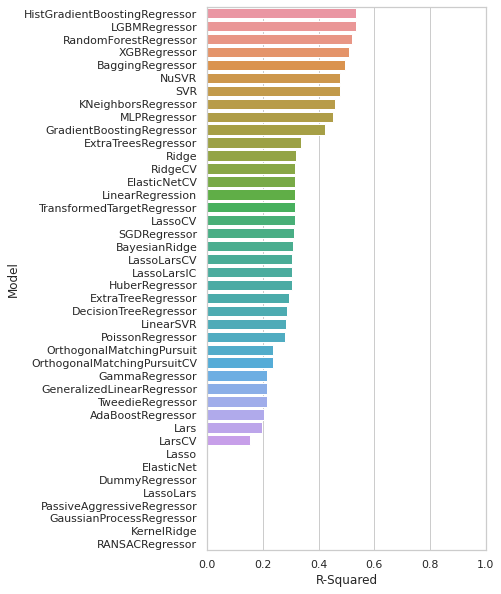

In [12]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

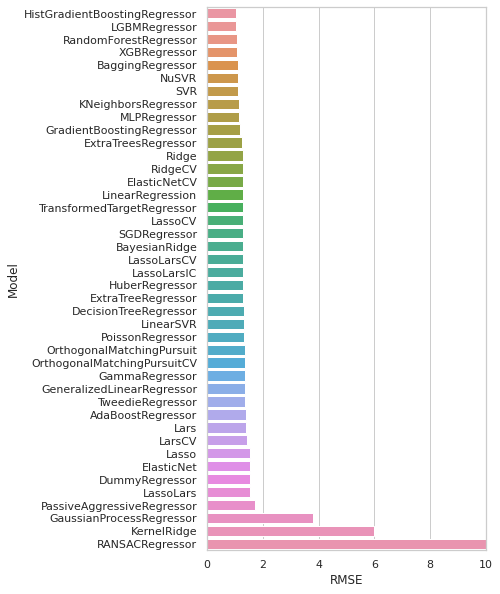

In [13]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

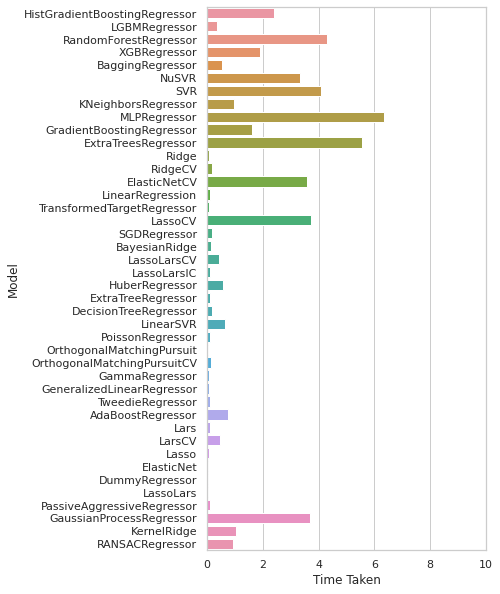

In [14]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))